In [2]:
!.\run.bat


C:\Users\Ђ«ҐЄб ­¤а \PROGRAM\Symmetry\mirror-symmetry>flake8

C:\Users\Ђ«ҐЄб ­¤а \PROGRAM\Symmetry\mirror-symmetry>python -m pytest -vv test 
============================= test session starts =============================
platform win32 -- Python 3.8.3, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- D:\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\Александра\PROGRAM\Symmetry\mirror-symmetry
collecting ... collected 14 items

test/test_contours.py::test_binarizer PASSED                             [  7%]
test/test_contours.py::test_contour PASSED                               [ 14%]
test/test_contours.py::test_sym_axis_list PASSED                         [ 21%]
test/test_contours.py::test_sym_contour PASSED                           [ 28%]
test/test_contours.py::test_contours_list PASSED                         [ 35%]
test/test_contours.py::test_datafolder PASSED                            [ 42%]
test/test_contours.py::test_fd PASSED                                    [ 50%]


In [1]:
%matplotlib inline

import os
from time import time

import numpy as np
from matplotlib import pyplot as plt

import zhu

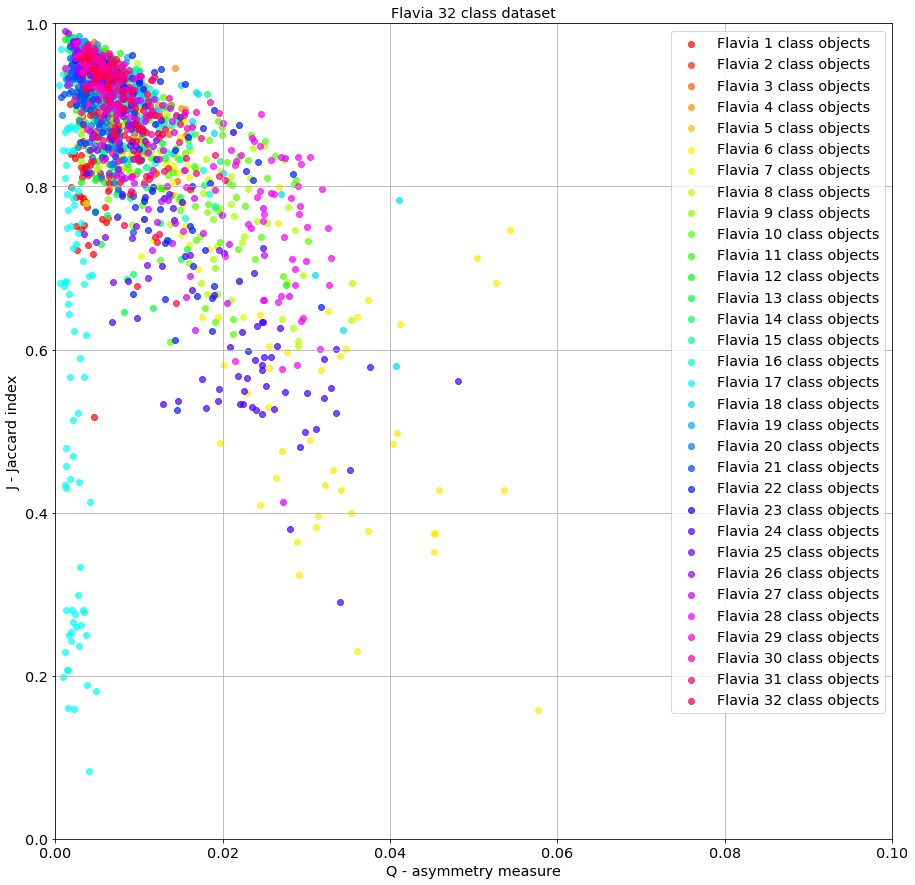

In [4]:
"""Asymmetry/Jaccard correlation"""
from experiments.vs_jaccard import VS_Jaccard
from zhu.draw_tools import save_plot
from other.rgb import MplColorHelper

save_all = False

filenames = [f"{i}.txt" for i in range(1, 33)]
my_folder = '../tmp_results'
so_folder = '../so_output'
color_helper = MplColorHelper('hsv', 0, len(filenames))
colors = color_helper.get_rgb_index()
for i, f in enumerate(filenames):
    my_f = my_folder + '/' + f
    so_f = so_folder + '/' + f
    vs = VS_Jaccard(my_f, so_f, '../vs_jaccard', f"Flavia {i+1} class")
    filename = f"flavia_{i+1}_vs_jaccard" if save_all else ''
    vs.scatter_plot(filename, 'png',
                    15, (0.0, 0.1), (0.0, 1.0), color=colors[i])
    if save_all:
        plt.show()
if not save_all:
    plt.grid()
    save_plot("confetti", "png", '../vs_jaccard')
    plt.show()

../data/fun/many_flies
fun/many_flies
0.08088235294117647
0.23225806451612904


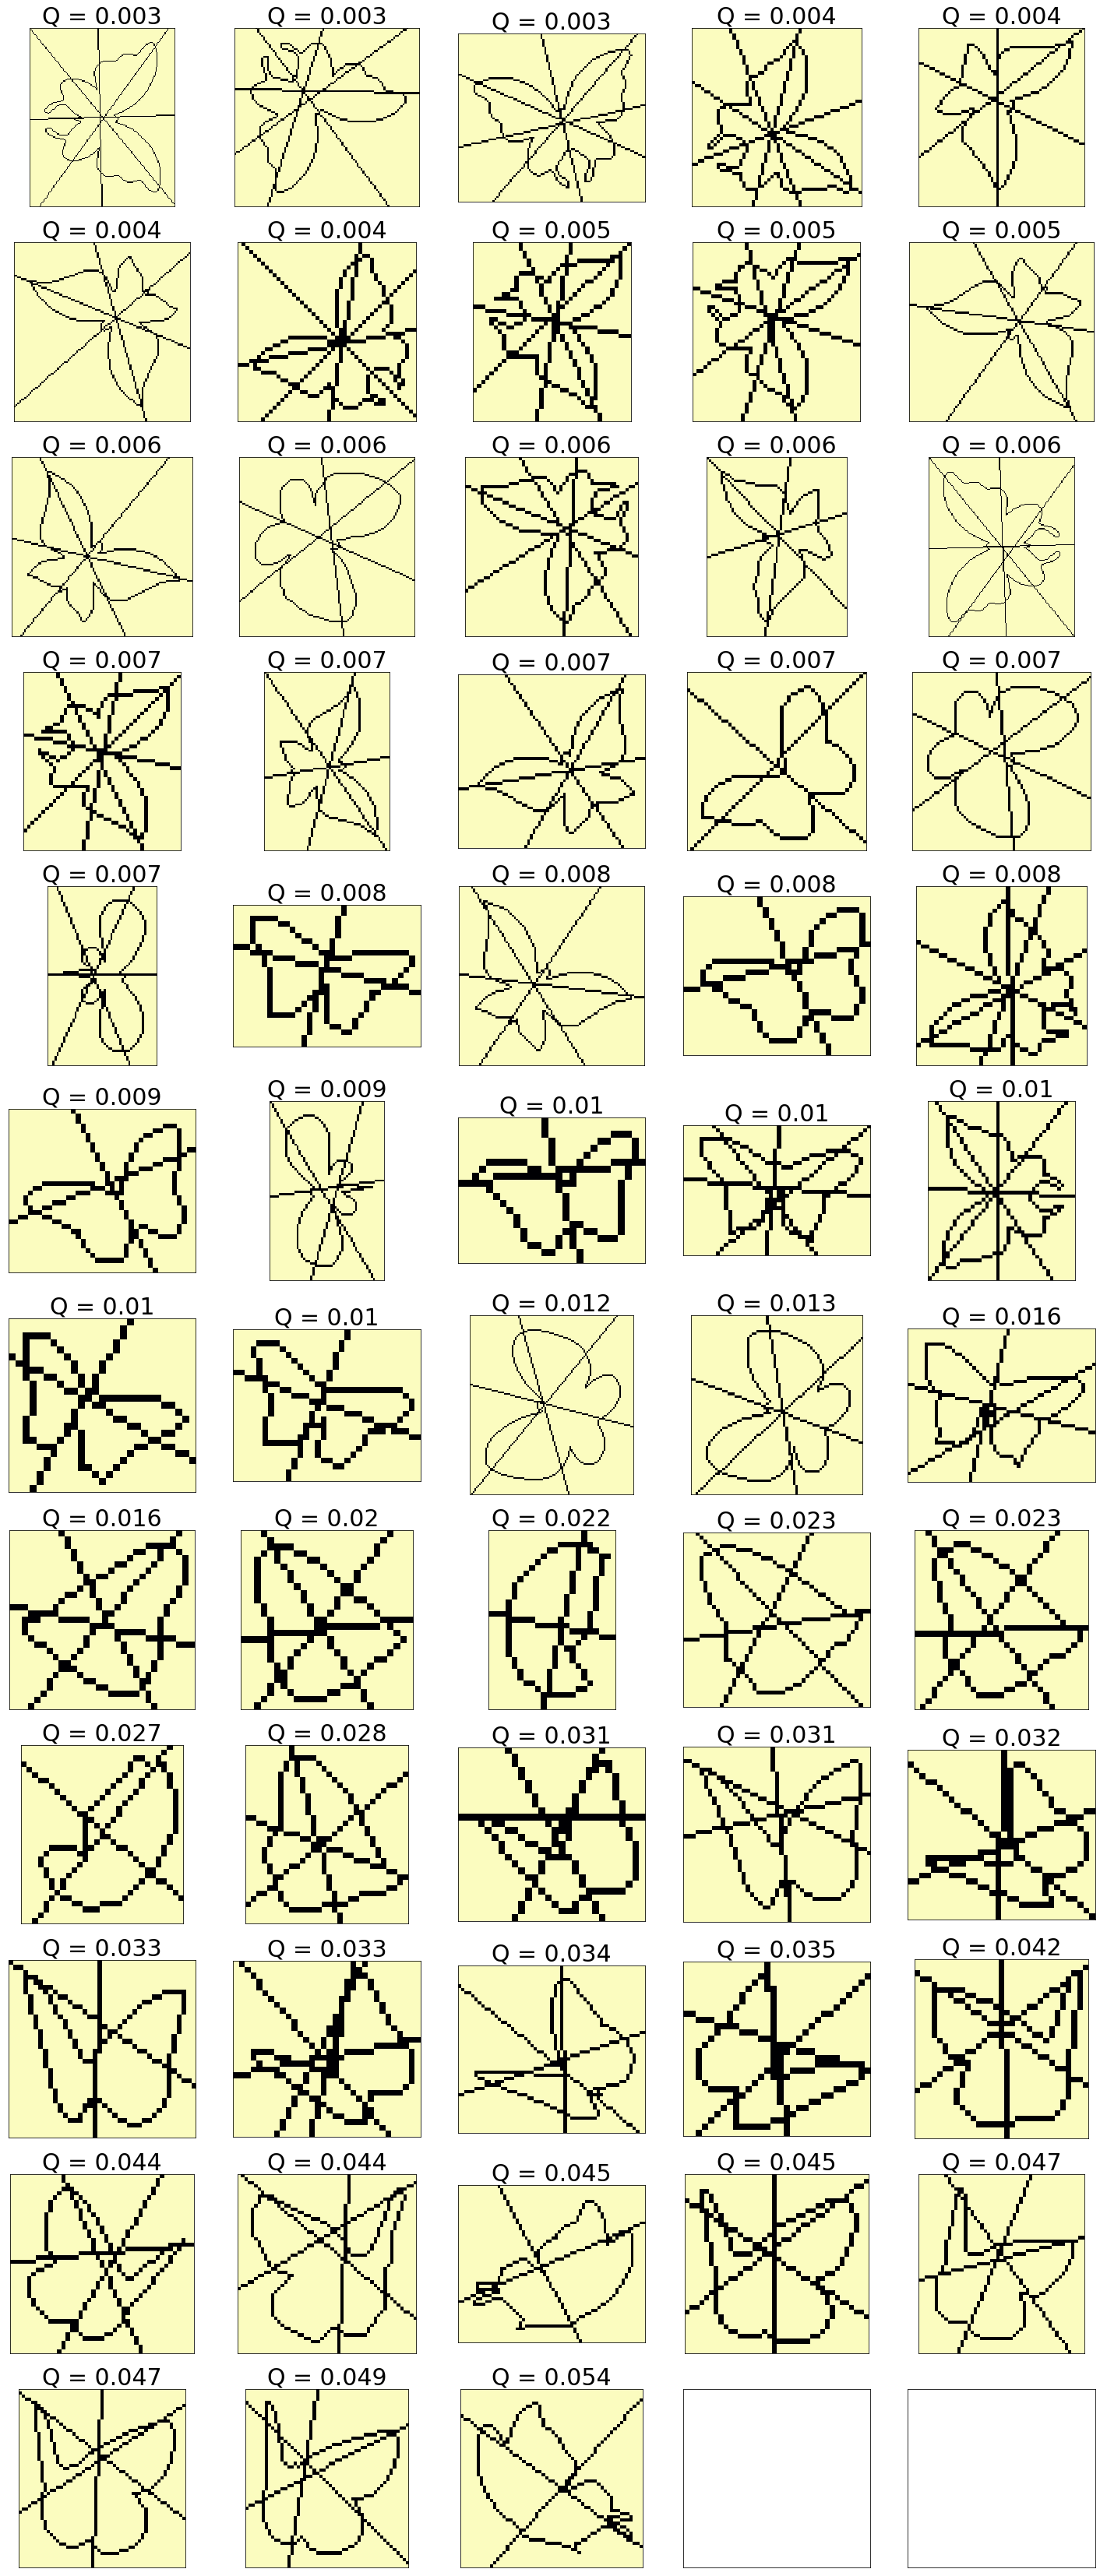

../data/06
06
0.034013605442176874
0.125


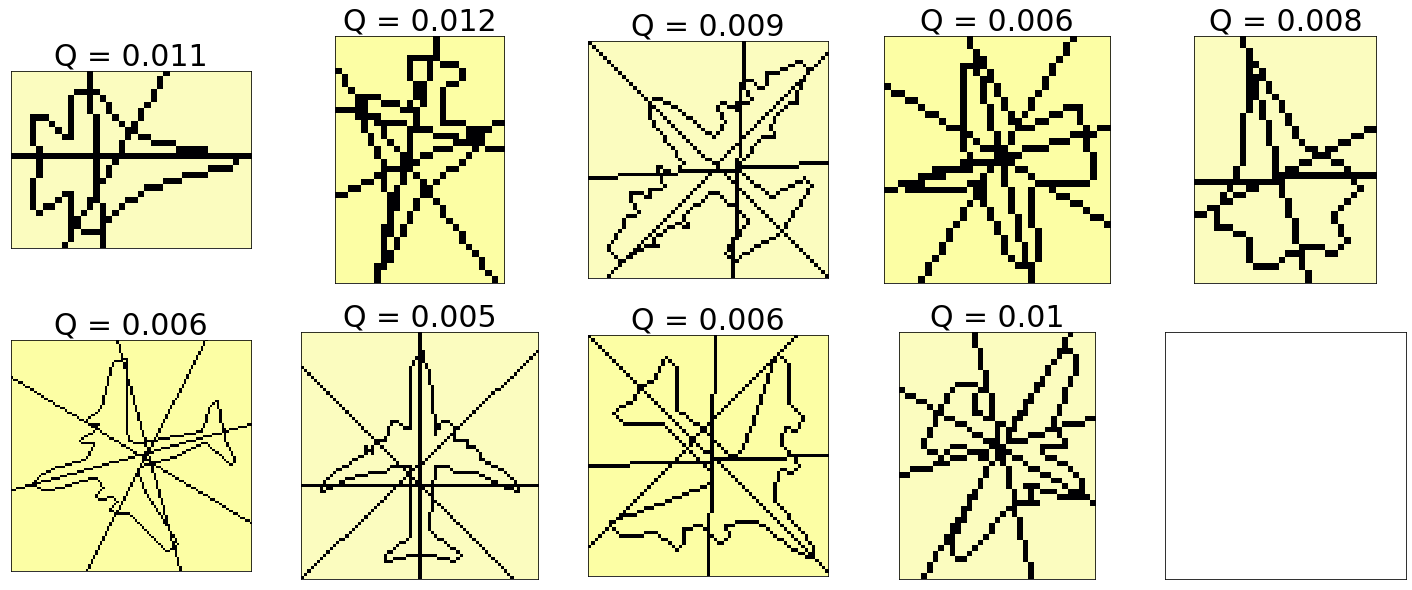

../data/03
03
0.04076086956521739
0.1111111111111111


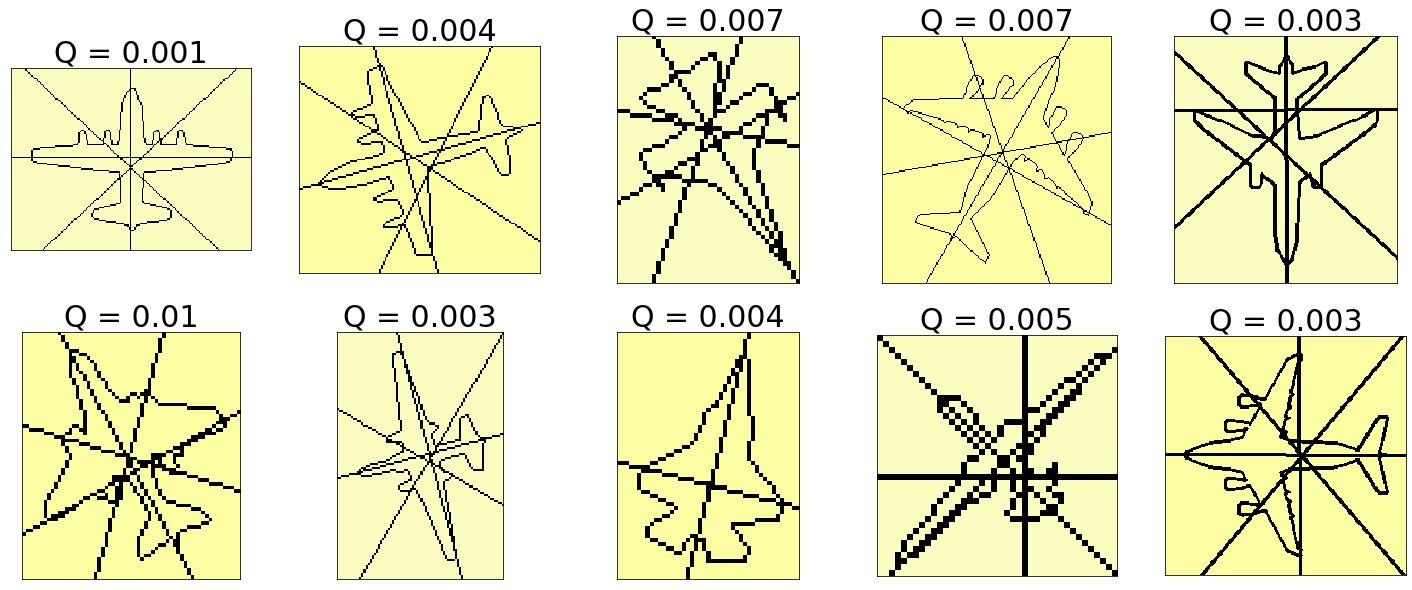

../data/masks_cleared
masks_cleared
0.042134831460674156
0.12109375


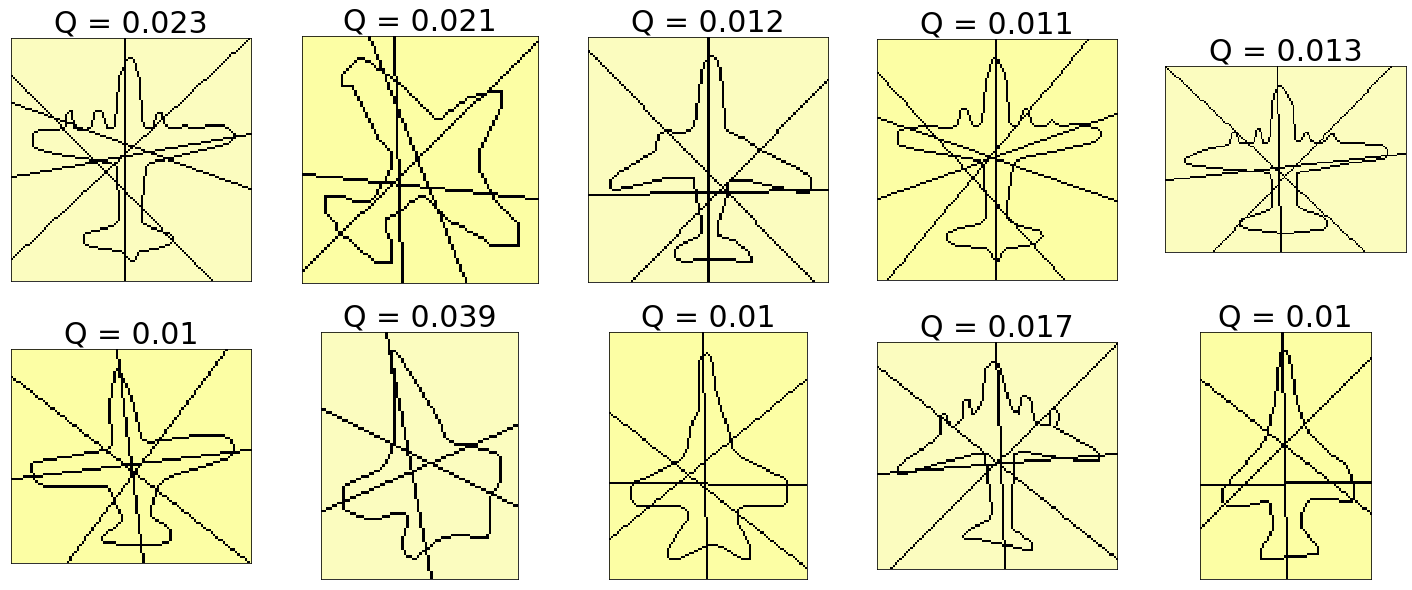

In [2]:
"""Train neibs"""
main_folder = '../data'
subfolders = ['fun/many_flies', '06', '03', 'masks_cleared']
s = zhu.Subploter(cols=5, rows=3)
cs_kw = {
    'mult_coef': 4,
    'beta_signal': 1.0,
    'neibs_hull': 1.0,
    'neibs_approximate': 1.0,
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': np.inf,
    'n_max_pixels': np.inf,
    'train_neibs': True
}
im_kw = {
    'single': False,
    'min_area': 200,
    'sym_contour_kwargs': cs_kw,
}
n = 10
s = zhu.Subploter()
for sf in subfolders:
    path = main_folder + '/' + sf
    print(path)
    df = zhu.DataFolder(path, im_kw, number=n)
    print(sf)
    print(df.Trained_neibs_hull)
    print(df.Trained_neibs_appr)
    s.plot(s.folder(df))
    plt.show()

fun/many_flies
Time = 4.392 s.


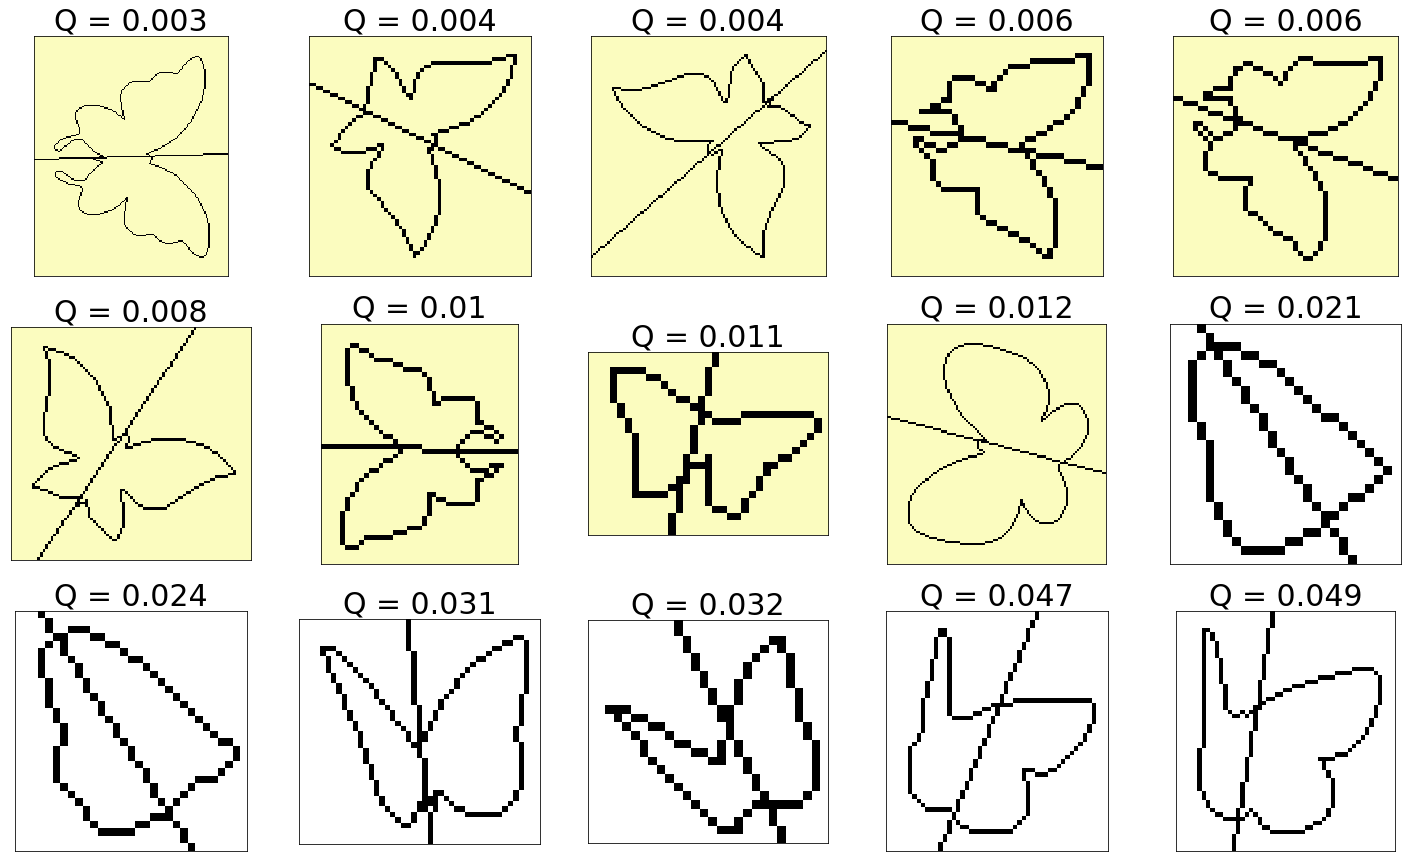

In [5]:
"""Flies pose classification example"""
main_folder = '../data'
subfolders = ['fun/many_flies']
np.random.seed(13)
s = zhu.Subploter(cols=5, rows=3)
cs_kw = {
    'q_max_signal': 0.05,
    'q_max_pixels': 0.02,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}
im_kw = {
    'single': False,
    'min_area': 200,
    'sym_contour_kwargs': cs_kw,
}
s.parent_folder(main_folder, subfolders, sym_image_kwargs=im_kw)

06
Time = 3.536 s.


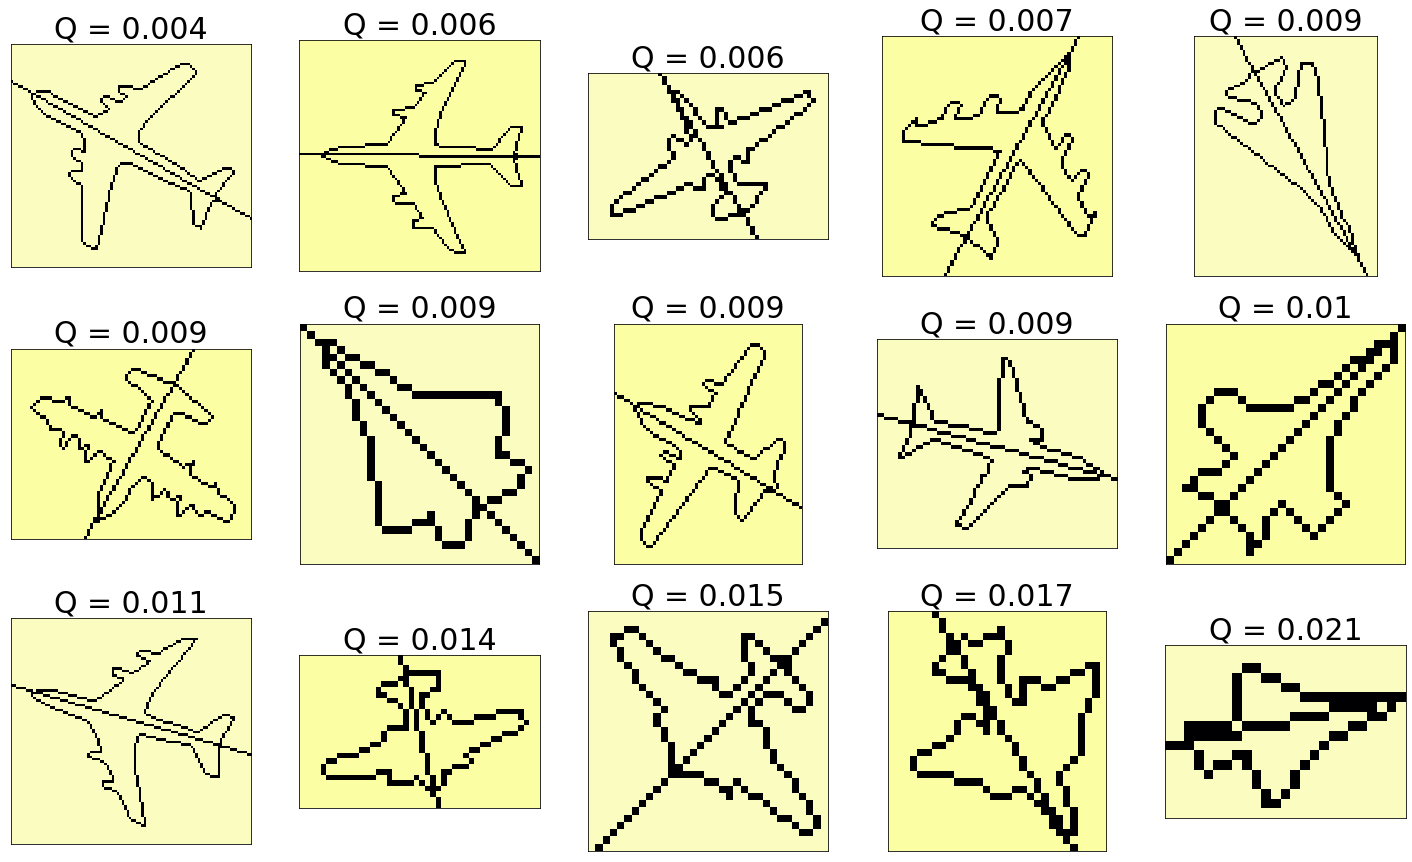

03
Time = 3.993 s.


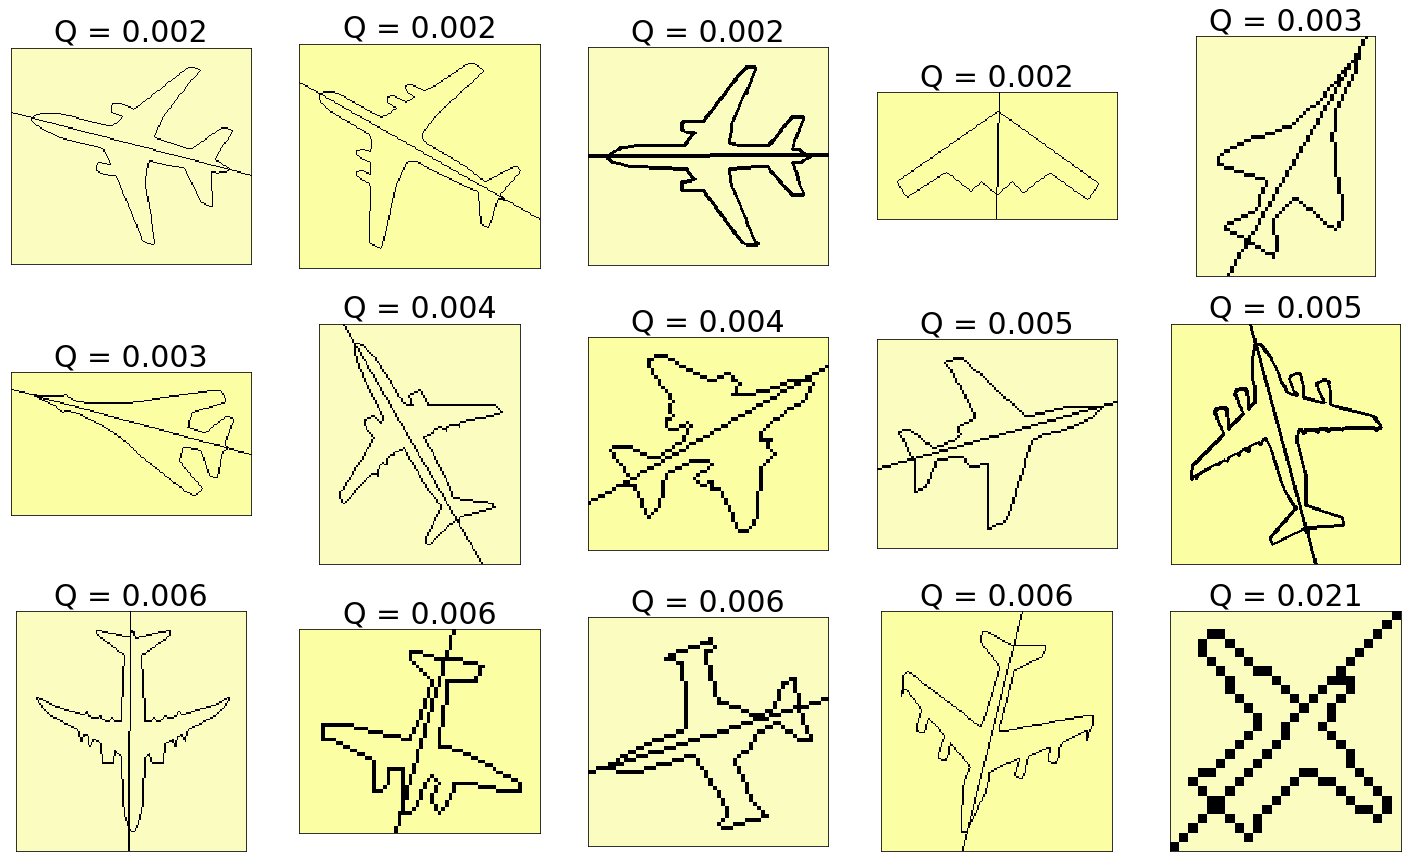

masks_cleared
Time = 3.504 s.


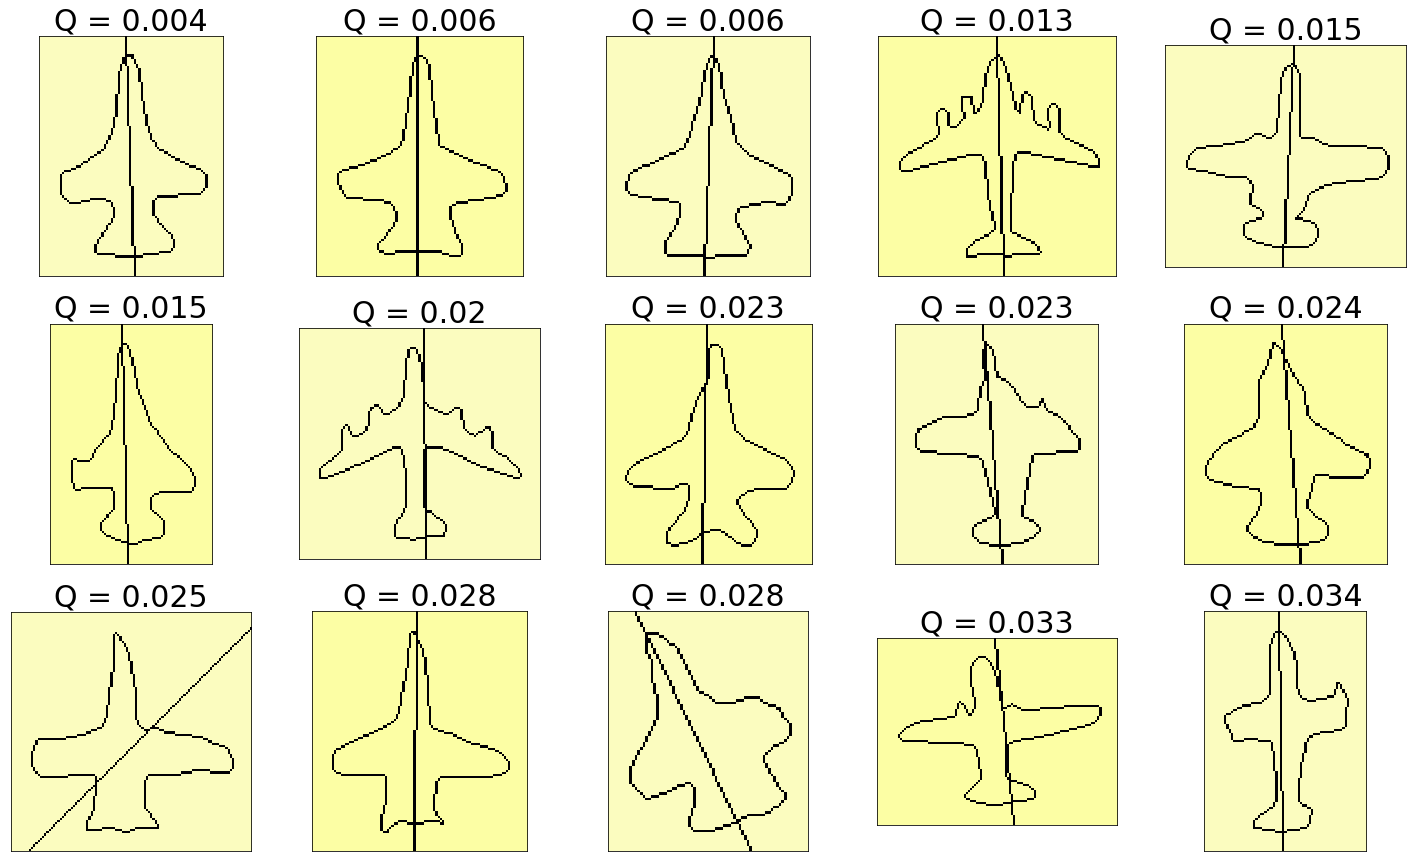

In [6]:
"""Plane simmetry axis examples"""
main_folder = '../data'
subfolders1 = ['06', '03']
subfolders2 = ['masks_cleared']
np.random.seed(4)
sc_kw = {
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}
im_kw = {
    'sym_contour_kwargs': sc_kw
}
s = zhu.Subploter(cols=5, rows=3)
s.parent_folder(main_folder, subfolders1, sym_image_kwargs=im_kw)
np.random.seed(9)
s.parent_folder(main_folder, subfolders2, sym_image_kwargs=im_kw)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


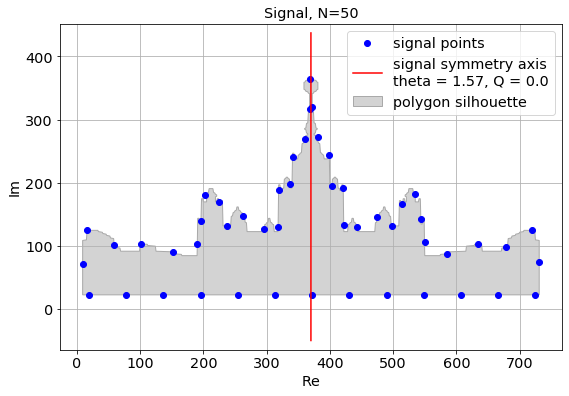

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


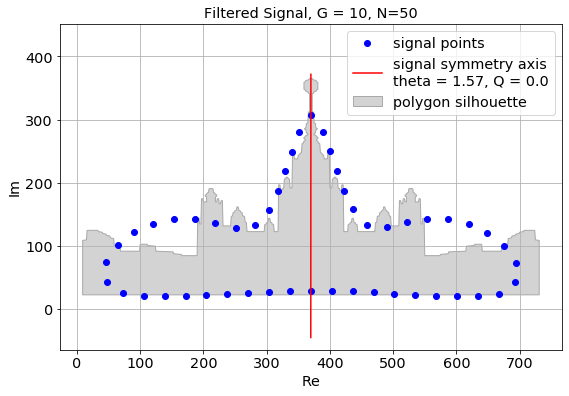

In [8]:
"""Contour frequency filtering example"""
res_folder = '../LaTeX/master/to_master/filter'
data_folder = '../data'

image_folder = data_folder + '/to_master'
image_name = 'MSU.bmp'

sc_kw = {
    'mult_coef': 0.1,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
d = zhu.SymContourDrawer(cnt, width=9, height=6, save_folder=res_folder)
d.plot_signal([cnt.Axis_list.lines[0]])
xlim = plt.xlim()
ylim = plt.ylim()
d.save(image.name + '_signal_sym')
d.plot_filter(0.18)
plt.xlim(xlim)
plt.ylim(ylim)
d.save(image.name + '_filter_sym')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


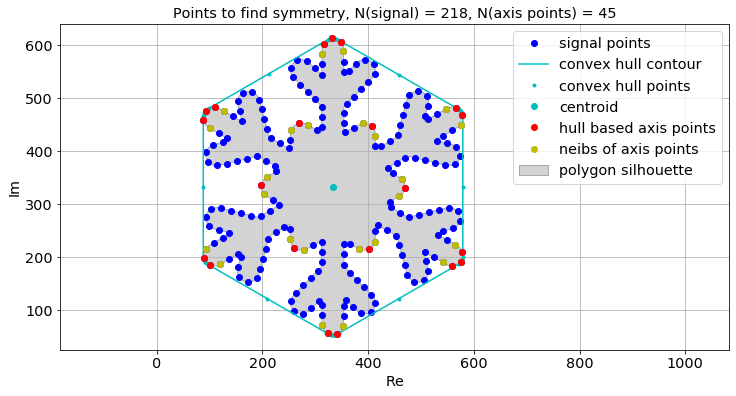

In [9]:
"""Hull based example"""
res_folder = '../LaTeX/master/to_master/hull'
data_folder = '../data'

image_folder = data_folder + '/to_master'
image_name = 'snow.bmp'

sc_kw = {
    'mult_coef': 0.5,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
d = zhu.SymContourDrawer(cnt, width=12, height=6,
                      save_format='eps', save_folder=res_folder)
d.plot_signal()
d.plot_hull(neibs=0.01)
plt.xlim(0, 900)
d.save(image.name + '_hull')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


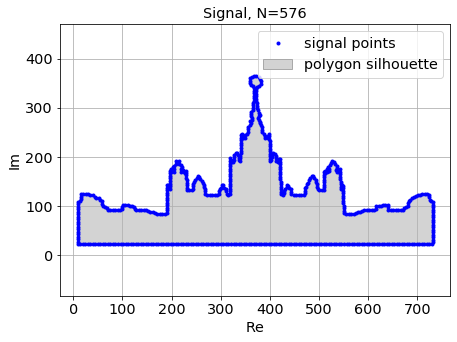

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


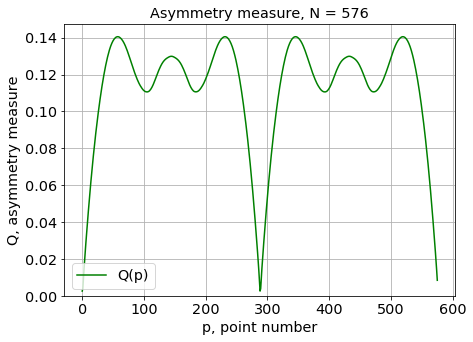

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


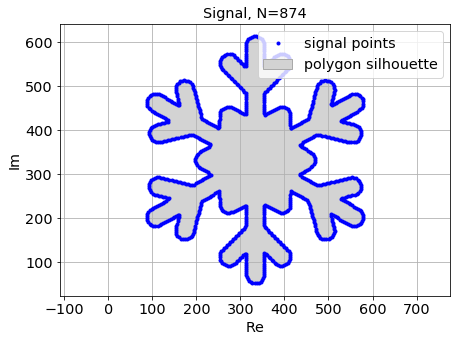

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


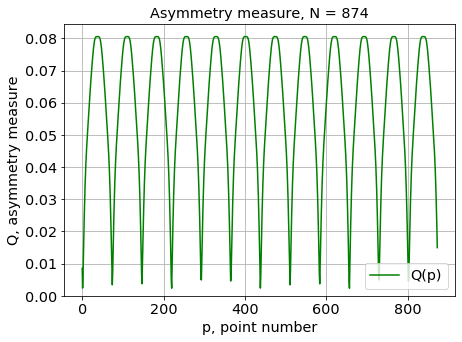

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


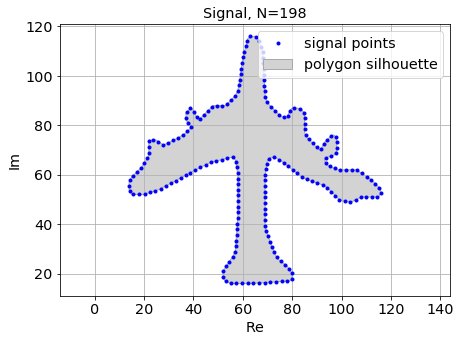

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


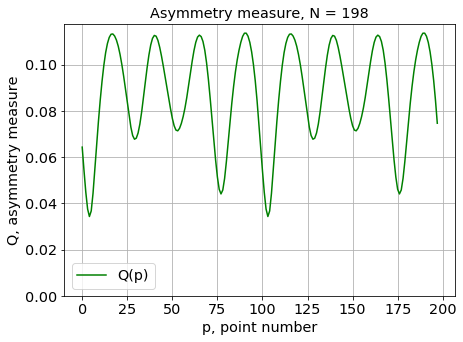

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


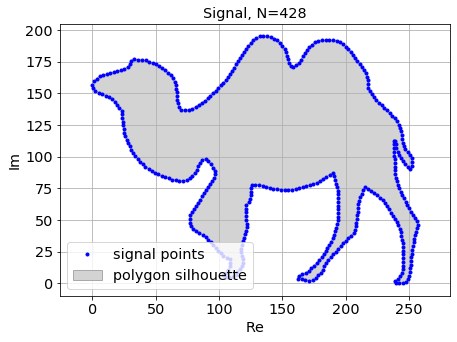

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


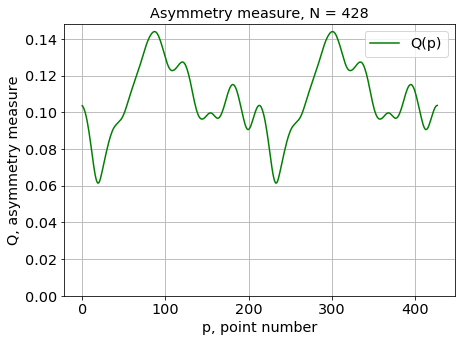

In [10]:
"""Symmetry measure examples"""
res_folder = '../LaTeX/master/to_master/measure'
data_folder = '../data'

image_folder = data_folder + '/to_master'
image_names = ['MSU.bmp', 'snow.bmp', '895.mask.bmp', 'camel.bmp']

for image_name in image_names:
    sc_kw = {
        'mult_coef': 2,
    }
    image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
    cnt = image.Contours_list[0]
    d = zhu.SymContourDrawer(cnt, width=7, height=5,
                          save_format='eps', save_folder=res_folder)
    d.signal_point_marker = 'b.'
    d.plot_signal()
    d.save(image.name+'_signal')
    d.plot_q()
    d.save(image.name + '_q')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


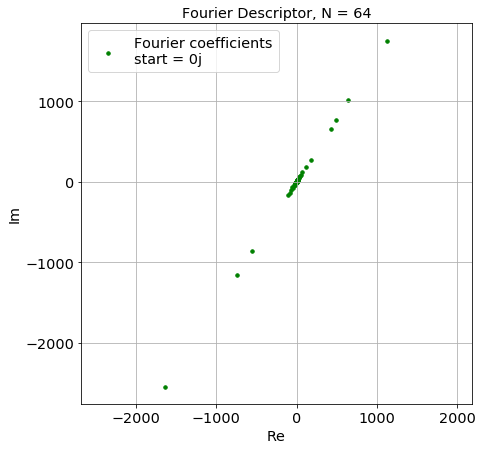

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


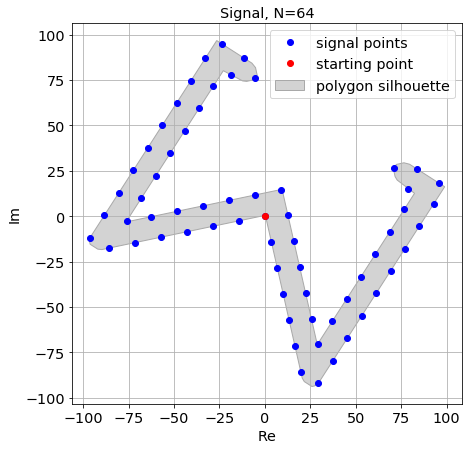

27:20: E225 missing whitespace around operator


In [11]:
"""Fourier descriptor for symmetrycal shape example"""
res_folder = r'../LaTeX/master/to_master/beamer'
data_folder = '../data'

image_folder = data_folder + '/truesym_examples'
image_name = 'sigma.bmp'

sc_kw = {
    'mult_coef': 0.1,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
u = cnt.origin * np.exp(1j) + 50 - 158j
cnt = zhu.SymContour(u)
d = zhu.SymContourDrawer(cnt, width=7, height=7,
                      save_format='eps', save_folder=res_folder)
fd = zhu.FourierDescriptor(cnt.Signal)
s_sym = np.argmin([fd.symmetry_measure(s) for s in range(len(fd))])

s2 = d.plot_f(s_sym, ret_zero=True)
d.save(image.name + '_fd_sym')

d.plot_signal()
plt.plot([np.real(s2)], [np.imag(s2)], 'ro',
         label='starting point')
d.save(image.name +'_discrete2')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


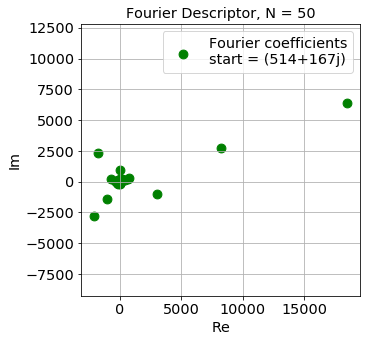

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


set


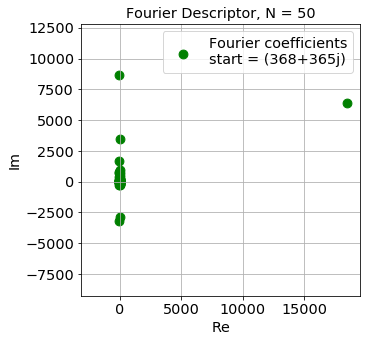

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


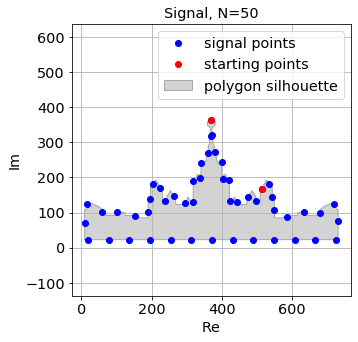

In [12]:
"""Fourier descriptor examples"""
res_folder = r'../LaTeX/master/to_master/borders'
data_folder = '../data'

image_folder = data_folder + '/msu'
image_name = 'MSU.bmp'

sc_kw = {
    'mult_coef': 0.1,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
d = zhu.SymContourDrawer(cnt, width=5, height=5,
                      save_format='eps', save_folder=res_folder)
fd = zhu.FourierDescriptor(cnt.Signal)
s_sym = np.argmin([fd.symmetry_measure(s) for s in range(len(fd))])
s_anti = 10 if s_sym != 10 else np.random.randint(len(fd))
assert s_sym != s_anti

s1 = d.plot_f(s_anti, ret_zero=True, set_limits=True)
d.save('msu_fd_anti')

s2 = d.plot_f(s_sym, ret_zero=True)
d.save('msu_fd_sym')

d.plot_signal()
plt.plot([np.real(s1), np.real(s2)], [np.imag(s1), np.imag(s2)], 'ro',
         label='starting points')
plt.ylim(0, 500)
d.save('msu_discrete2')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


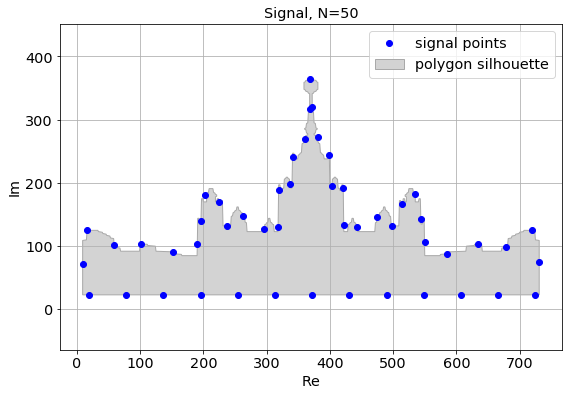

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


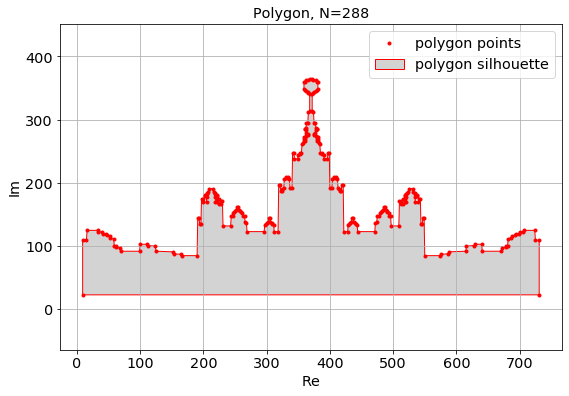

In [13]:
"""Boundary polygon and discretisation examples"""
res_folder = r'../LaTeX/master/to_master/descriptor'
data_folder = '../data'

image_folder = data_folder + '/msu'
image_name = 'MSU.bmp'

sc_kw = {
    'mult_coef': 0.1,
}

image = zhu.SymImage(image_folder, image_name, sym_contour_kwargs=sc_kw)
cnt = image.Contours_list[0]
d = zhu.SymContourDrawer(cnt, width=9, height=6, save_folder=res_folder)

d.plot_signal()
d.save('msu_discrete')

d.origin_edge_color = 'r'
d.plot()
d.save('msu_polygon')

camel
Time = 6.784 s.


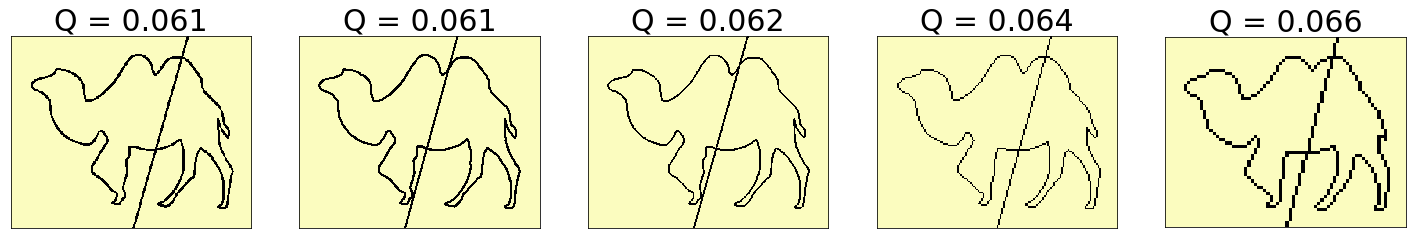

plane
Time = 6.444 s.


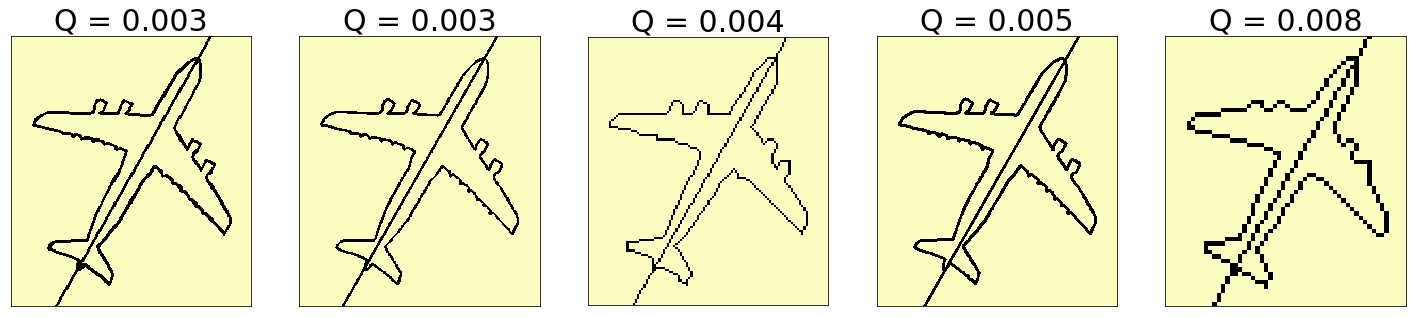

In [14]:
"""Be sure that scaling doesn't metter"""
main_folder = '../data/scaled'
s = zhu.Subploter(allow_multiple_lines=False,
                  cmap_changing=False)
s.parent_folder(main_folder)

In [ ]:
"""Write results to be used in Sonya's experiments"""
sc_kw = {
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': 4,
    'n_max_pixels': 2,
}
im_kw = {
    'sym_contour_kwargs': sc_kw
}

rw = zhu.ResultWriter(timeit_number=3, force_single_axis=False)
rw.parent_folder('../data/Flavia', res_folder='tmp_results', sym_image_kwargs=im_kw)

In [ ]:
"""Write results to be used in Sonya's experiments"""
sc_kw = {
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}
im_kw = {
    'sym_contour_kwargs': sc_kw
}

rw = zhu.ResultWriter(timeit_number=3, force_single_axis=True)
rw.parent_folder('../data', subfolders=['butterfly'], res_folder='../tmp_results', sym_image_kwargs=im_kw)

In [ ]:
"""Show symmetry axis of given subfolders of main_folder"""
folders = {

#     '../data': [
#         'multisym',
#         'to_visapp/planes',
#         'to_visapp/many',
#         'butterfly'
#     ],

#     '../data/MPEG7': None,

    '../data/Flavia': None
}

sc_kw = {
    'q_max_signal': np.inf,
    'q_max_pixels': np.inf,
    'n_max_signal': 4,
    'n_max_pixels': 2,
}
im_kw = {
    'sym_contour_kwargs': sc_kw,
}

s = zhu.Subploter(force_single_axis=True, allow_multiple_lines=False, cols=6)
for main_folder, subfolders in folders.items():
    s.parent_folder(main_folder, subfolders, sym_image_kwargs=im_kw)

In [1]:
%matplotlib inline
from experiments.mult_and_beta import ChangeParameters

cp = ChangeParameters()
cp.run()

ModuleNotFoundError: No module named 'zhu.symmetry'

birch_FIBCh_clean
Time = 42.82 s.


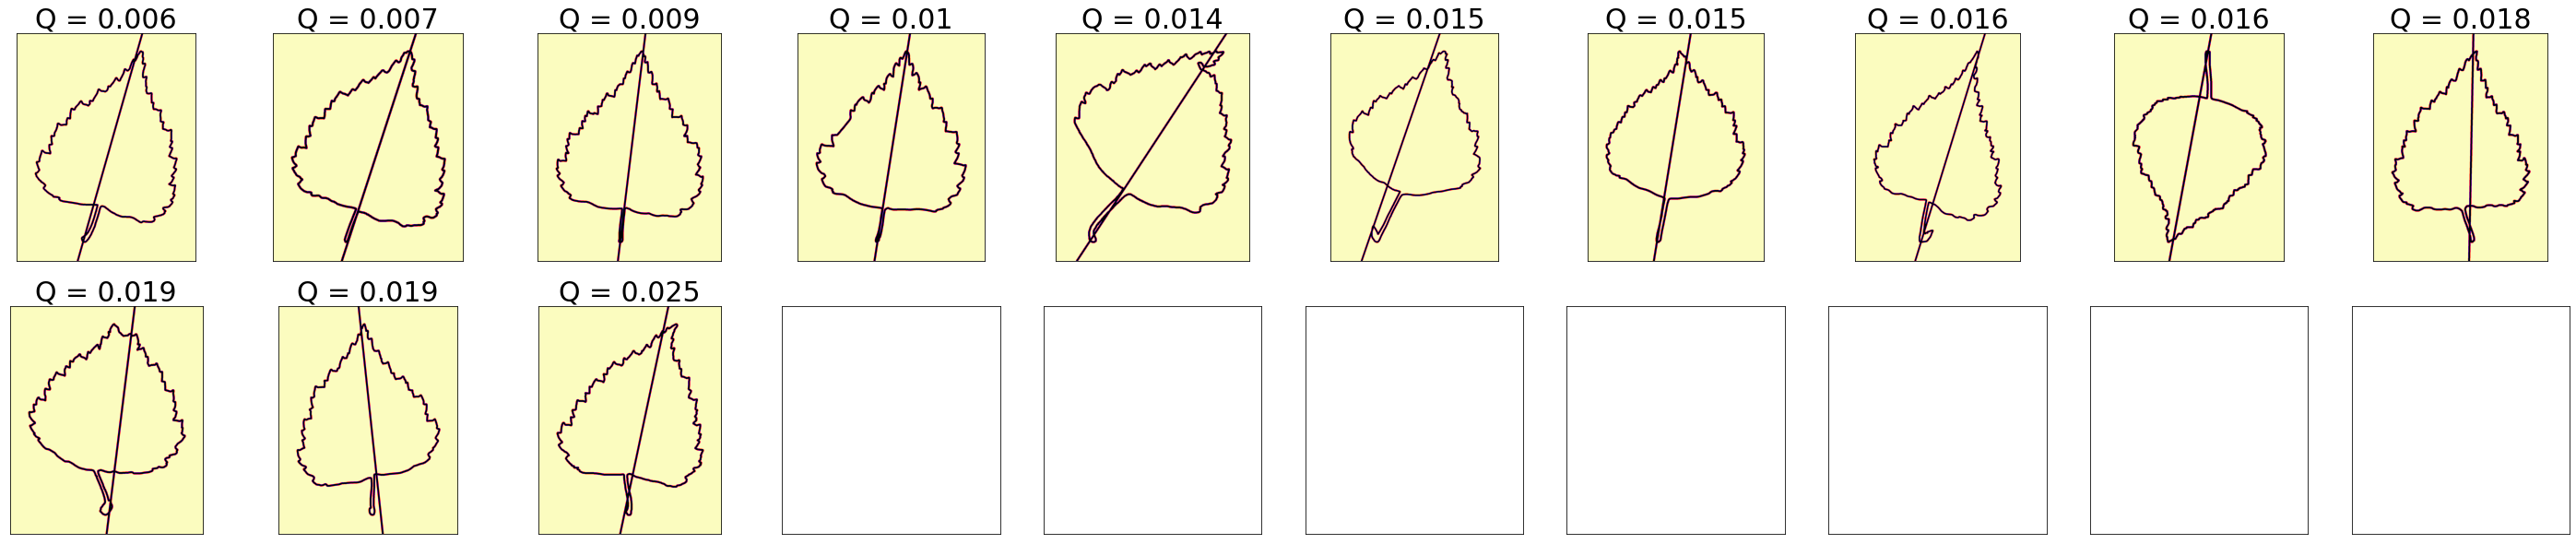

birch_Zaychik_dirty
Time = 49.297 s.


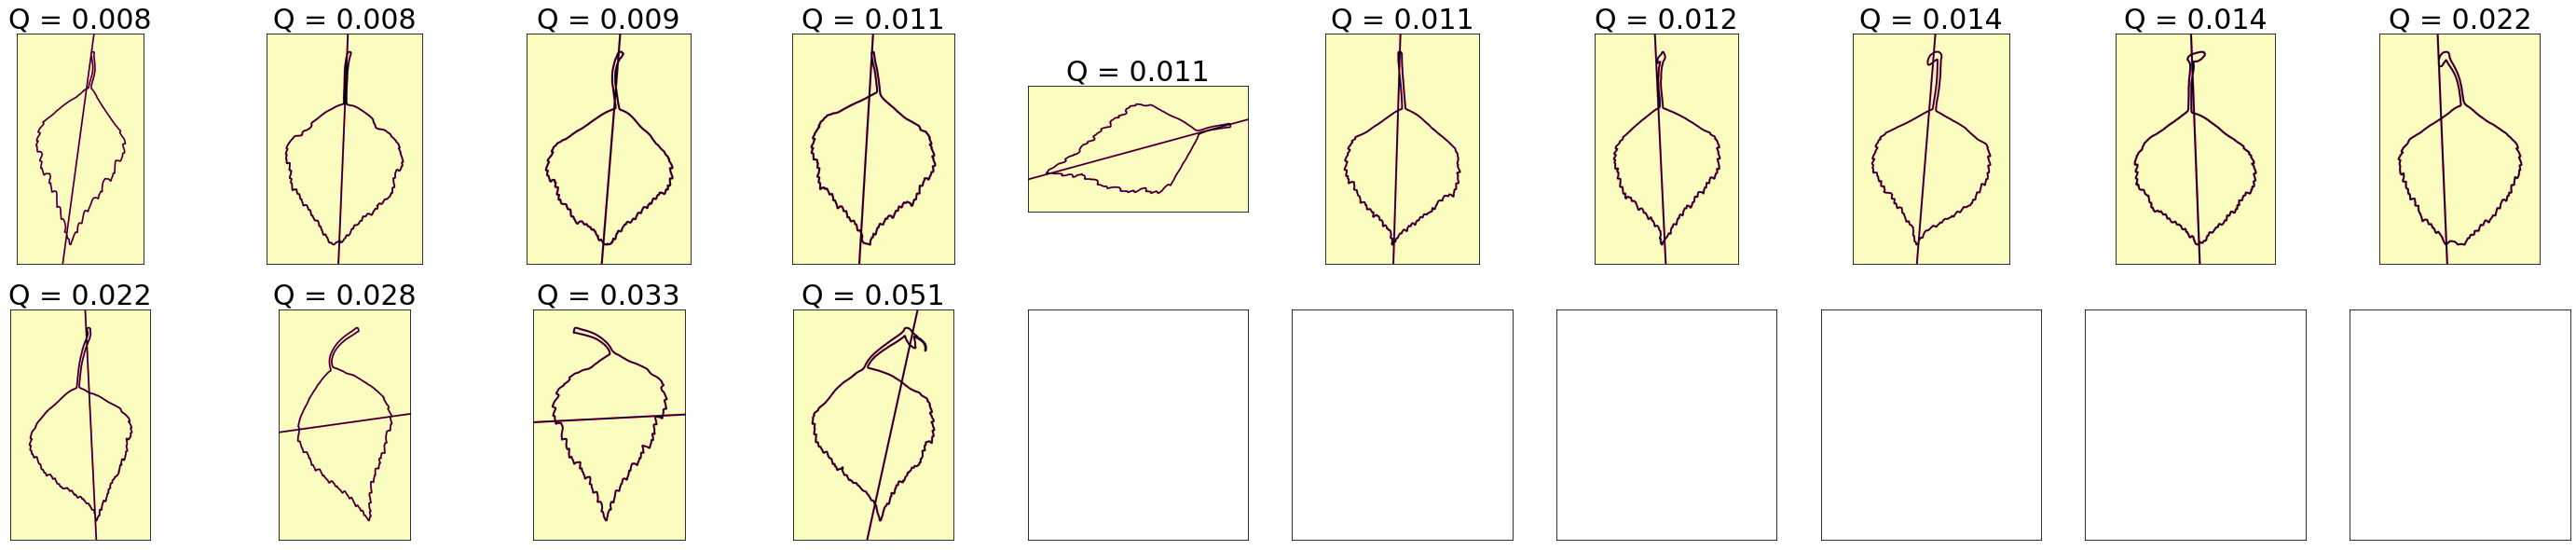

In [2]:
"""Birch leaves classification example"""
main_folder = '../data/leaves'
subfolders = None
np.random.seed(13)
s = zhu.Subploter(cols=10)
cs_kw = {
    'q_max_signal': np.inf, # 0.05,
    'q_max_pixels': np.inf, # 0.02,
    'n_max_signal': 2,
    'n_max_pixels': 1,
}
im_kw = {
    'single': False,
    'min_area': 1e5,
    'sym_contour_kwargs': cs_kw,
}
s.parent_folder(main_folder, subfolders, sym_image_kwargs=im_kw)

In [1]:
%matplotlib inline

import os
from time import time

import numpy as np
from matplotlib import pyplot as plt


import zhu

In [2]:
main_folder = '../data/leaves'
silhouettes_path = '../data/leaves/silhouettes.txt'
skeletons_path = '../data/leaves/skeletons.txt'
true_files_path = '../data/leaves/true_files.txt'

if not os.path.isfile(silhouettes_path):
    if os.path.isfile(skeletons_path):
        os.remove(skeletons_path)
    if os.path.isfile(true_files_path):
        os.remove(true_files_path)
    with open(silhouettes_path, 'w') as f:
        for subfolder in os.listdir(main_folder):
            folder = os.path.join(main_folder, subfolder, 'preprocessed')
            if not os.path.isdir(folder):
                continue
            for name in os.listdir(folder):
                if '_silhouettes_' in name and name.endswith('.bmp'):
                    path = os.path.join('..', '..', folder, name).replace('/', '\\') 
                    f.write(path + '\n')

with open(silhouettes_path, 'r') as f:
    print(f.read())

..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_1..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_10..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_11..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_12..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_13..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_2..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_3..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_4..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_5..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_6..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_7..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_8..bmp
..\..\..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_s

In [3]:
skeletons_path = '../data/leaves/skeletons.txt'
true_files_path = '../data/leaves/true_files.txt'
with open(skeletons_path, 'r') as f:
    skeletons_description = f.read()
with open(true_files_path, 'r') as f:
    true_files = f.read().split('\n')[:-1]
true_files = [f[6:] for f in true_files]
assert all([f.startswith(main_folder.replace('/', '\\')) for f in true_files])

In [4]:
import cv2

from zhu.draw_tools import imread_bw, imshow_bw, prepare_scene
from zhu.skeleton import *

..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_1..bmp
..\data\leaves\birch_FIBCh_clean\BPP211.bmp
1138.9463392054465 282.1755854841954
0.2478

..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_10..bmp
..\data\leaves\birch_FIBCh_clean\BPP211.bmp
1403.0096925352582 290.64093495289995
0.2072

..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_11..bmp
..\data\leaves\birch_FIBCh_clean\BPP211.bmp
1396.749895200464 321.3791759600878
0.2301

..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_12..bmp
..\data\leaves\birch_FIBCh_clean\BPP211.bmp
1142.2045677380559 289.001406616435
0.253

..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_13..bmp
..\data\leaves\birch_FIBCh_clean\BPP211.bmp
1237.617737081912 314.40697579912853
0.254

..\data\leaves\birch_FIBCh_clean\preprocessed\BPP211_silhouettes_2..bmp
..\data\leaves\birch_FIBCh_clean\BPP211.bmp
1184.3015655119036 236.27089255286322
0.1995

..\data\leaves\birch_FIBCh_clean

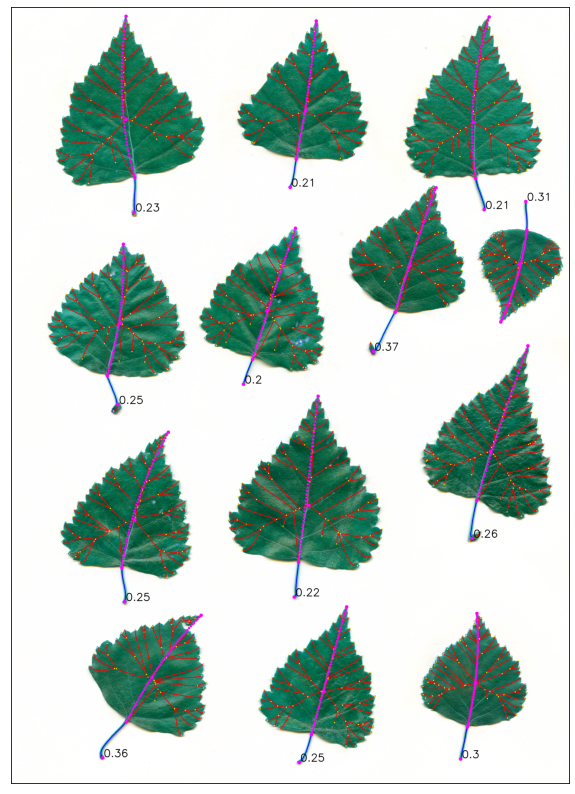

1554.2815433381477 362.11057553371046
0.233

..\data\leaves\birch_Zaychik_dirty\preprocessed\BPP111_silhouettes_10..bmp
..\data\leaves\birch_Zaychik_dirty\BPP111.bmp
1225.0746504875483 484.49437849052276
0.3955

..\data\leaves\birch_Zaychik_dirty\preprocessed\BPP111_silhouettes_11..bmp
..\data\leaves\birch_Zaychik_dirty\BPP111.bmp
1563.5230770775158 715.3604586655732
0.4575

..\data\leaves\birch_Zaychik_dirty\preprocessed\BPP111_silhouettes_12..bmp
..\data\leaves\birch_Zaychik_dirty\BPP111.bmp
1428.5989786700716 465.4196053163774
0.3258

..\data\leaves\birch_Zaychik_dirty\preprocessed\BPP111_silhouettes_13..bmp
..\data\leaves\birch_Zaychik_dirty\BPP111.bmp
1506.4060830601888 404.11990438676327
0.2683

..\data\leaves\birch_Zaychik_dirty\preprocessed\BPP111_silhouettes_14..bmp
..\data\leaves\birch_Zaychik_dirty\BPP111.bmp
1322.307918383613 512.7460530112497
0.3878

..\data\leaves\birch_Zaychik_dirty\preprocessed\BPP111_silhouettes_2..bmp
..\data\leaves\birch_Zaychik_dirty\BPP111.bmp
1351

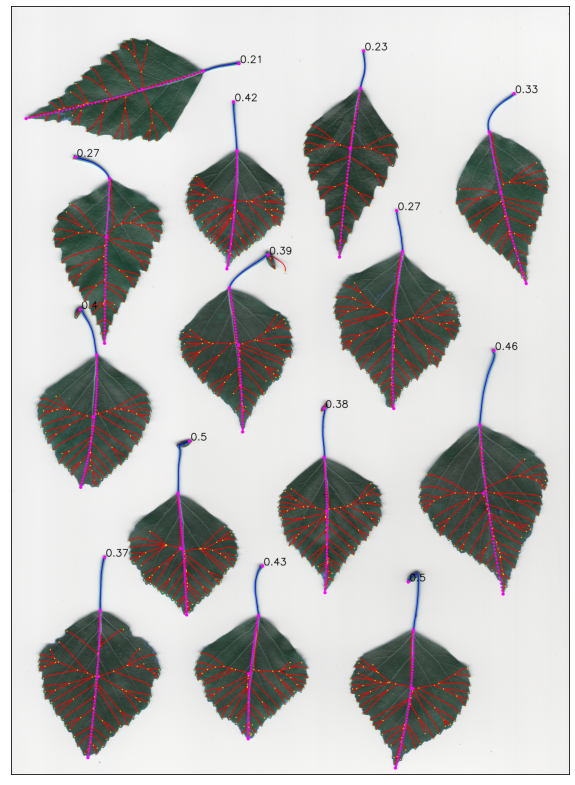

In [5]:
descriptor_len = 8
skeletons = []
old_rgb_path = ''
for path, skeleton_descriptor in zip(
        true_files,
        skeletons_description.split('\n')[:-1]):
    digits = skeleton_descriptor.split(' ')[:-1]
    edge_list = []
    for edge_i in range(len(digits) // descriptor_len):
        part = digits[
            edge_i * descriptor_len
            :(edge_i+1) * descriptor_len]
        
        x0, y0, d0, r0, x1, y1, d1, r1 = [float(d) for d in part]
        
        v0 = SkeletonVertex(x0, y0, d0, r0)
        v1 = SkeletonVertex(x1, y1, d1, r1)
        
        if v0 == v1:
            continue
        
        e = SkeletonEdge(v0, v1)
        edge_list.append(e)
    skeleton = LeaveSkeleton(edge_list, path)
    skeleton.center_vertex.draw_kwargs['radius'] = 15
    skeletons.append(skeleton)
    
    print(skeleton.origin_path)
#     prepare_scene(10, 20)
#     imshow_bw(skeleton.origin, cmap='Greys')
#     plt.show()
    rgb_path = skeleton.origin_path.split('_silhouettes_')[0]+'.bmp'
    rgb_path = rgb_path.replace('preprocessed\\', '')
    if not os.path.isfile(rgb_path):
        rgb_path = skeleton.origin_path.split('_silhouettes_')[0]+'.jpg'
        rgb_path = rgb_path.replace('preprocessed\\', '')
    if not os.path.isfile(rgb_path):
        print('Origin rgb not founded')
    print(rgb_path)
    if rgb_path != old_rgb_path:
        if old_rgb_path != '':
            tmp_folder = os.path.join(os.path.dirname(old_rgb_path), 'preprocessed')
            name, ext = os.path.splitext(os.path.basename(old_rgb_path))
            new_path = os.path.join(tmp_folder, name+'_skeletons.png')
            
            prepare_scene(10, 20)
            imshow_bw(board[::-1], inverse=False)
            print('save to', new_path)
            plt.savefig(new_path)
            plt.show()
        
        board = cv2.imread(rgb_path)[::-1]
    old_rgb_path = rgb_path
    board = skeleton.draw(board)
    
    print(skeleton.leave_body_length, skeleton.leave_stalk_length)
    print(round(skeleton.leave_stalk_length / skeleton.leave_body_length, 4))
#     for d in range(1, 4):
#         print(d, skeleton.count_degree(d))
    print()
tmp_folder = os.path.join(os.path.dirname(rgb_path), 'preprocessed')
name, ext = os.path.splitext(os.path.basename(rgb_path))
new_path = os.path.join(tmp_folder, name+'_skeletons.png')

prepare_scene(10, 20)
imshow_bw(board[::-1], inverse=False)
plt.savefig(new_path)
plt.show()

In [6]:
import numpy as np
from zhu.curve_fit import *

In [2]:
xpoints = np.arange(10)
ypoints = -np.log(xpoints+1) - (xpoints+10)**2 + (xpoints+5)**3
degree = 3

points = np.array([xpoints, ypoints]).T
bezier = BezierCurve(points)

In [3]:
bezier.bezier_curve().T

array([[0.00000000e+00, 1.83673469e-01, 3.67346939e-01, 5.51020408e-01,
        7.34693878e-01, 9.18367347e-01, 1.10204082e+00, 1.28571429e+00,
        1.46938776e+00, 1.65306122e+00, 1.83673469e+00, 2.02040816e+00,
        2.20408163e+00, 2.38775510e+00, 2.57142857e+00, 2.75510204e+00,
        2.93877551e+00, 3.12244898e+00, 3.30612245e+00, 3.48979592e+00,
        3.67346939e+00, 3.85714286e+00, 4.04081633e+00, 4.22448980e+00,
        4.40816327e+00, 4.59183673e+00, 4.77551020e+00, 4.95918367e+00,
        5.14285714e+00, 5.32653061e+00, 5.51020408e+00, 5.69387755e+00,
        5.87755102e+00, 6.06122449e+00, 6.24489796e+00, 6.42857143e+00,
        6.61224490e+00, 6.79591837e+00, 6.97959184e+00, 7.16326531e+00,
        7.34693878e+00, 7.53061224e+00, 7.71428571e+00, 7.89795918e+00,
        8.08163265e+00, 8.26530612e+00, 8.44897959e+00, 8.63265306e+00,
        8.81632653e+00, 9.00000000e+00],
       [2.50000000e+01, 3.54578011e+01, 4.69030207e+01, 5.93726790e+01,
        7.29037962e+01,

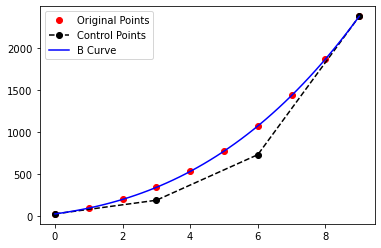

In [4]:
bezier.plot(50)

In [5]:
bezier.key_points

array([[   0.        ,   25.        ],
       [   3.        ,  187.94838922],
       [   6.        ,  731.21445522],
       [   9.        , 2380.69741491]])

In [3]:
data = bezier.key_points
data

matrix([[   0.        ,   25.        ],
        [   3.        ,  187.94838922],
        [   6.        ,  731.21445522],
        [   9.        , 2380.69741491]])

In [6]:
for p in points:
    print(p)

[[ 0. 25.]]
[[  3.         187.94838922]]
[[  6.         731.21445522]]
[[   9.         2380.69741491]]


In [7]:
nTimes = 10

points = data
nPoints = len(points)
xPoints, yPoints = np.array(points).T

t = np.linspace(0.0, 1.0, nTimes)

polynomial_array = np.array([
    bernstein_poly(i, nPoints - 1, 1-t) for i in range(0, nPoints)])

xvals = np.dot(xPoints, polynomial_array)
yvals = np.dot(yPoints, polynomial_array)

xvals, yvals

NameError: name 'bernstein_poly' is not defined

In [5]:
t = 1.3

polynomial_array = np.array([
    bernstein_poly(i, nPoints - 1, 1-t) for i in range(0, nPoints)])

np.dot(xPoints, polynomial_array), np.dot(yPoints, polynomial_array)

(11.699999999999987, 4183.509918778741)

In [6]:
from scipy.special import comb

def bezier_curve_t(t, key_points):   
    i = np.arange(len(key_points))
    n = len(key_points) - 1
    polynomial_array = comb(n, i) * ((1-t) ** (n - i)) * (t ** i)
    return np.dot(polynomial_array, data)

def distance(t, point, key_points):
    x_, y_ = bezier_curve_t(t, key_points)
    x, y = point
    return ((x-x_)**2 + (y-y_)**2)**0.5

In [7]:
from scipy.optimize import minimize

x, y = 100000, 10

def bezier_coord(point, key_points):
    result = minimize(distance, 0, (point, data))
    t = result.x.mean()
    t = max(min(t, 1), 0)
    d = distance(t, point, data)
    return t, d


In [8]:
l = bezier_curve_length(data, nTimes)

In [9]:
t*l, d

(380.8446718796585, 99997.34906252407)

In [12]:
t = 0.2

n = 3
k = np.arange(n + 1)
comb(n, k) * t ** k * (1 - t) ** (n - k)

array([0.512, 0.384, 0.096, 0.008])

In [18]:
a = np.array([[1, 2], [3, 4]])
x = np.array([1, 2])
a.dot(x)

array([ 5, 11])

In [20]:
np.matrix(a) * x.reshape((-1, 1))

matrix([[ 5],
        [11]])

In [17]:
t = np.array([0.2, 0.0]).reshape((-1, 1))

n = 3
k = np.arange(n + 1)
comb(n, k) * t ** k * (1 - t) ** (n - k)

array([[0.512, 0.384, 0.096, 0.008],
       [1.   , 0.   , 0.   , 0.   ]])

In [57]:
bezier_curve_t(1.3, data)

array([  11.7       , 4183.50991878])

In [35]:
polynomial_array

array([0.125, 0.375, 0.375, 0.125])

In [29]:
x, y = np.dot(polynomial_array, data)
x, y

(4.5, 645.3982435277635)

In [12]:
polynomial_array

array([[0.        , 0.00137174, 0.01097394, 0.03703704, 0.0877915 ,
        0.17146776, 0.2962963 , 0.47050754, 0.70233196, 1.        ],
       [0.        , 0.03292181, 0.11522634, 0.22222222, 0.32921811,
        0.41152263, 0.44444444, 0.40329218, 0.26337449, 0.        ],
       [0.        , 0.26337449, 0.40329218, 0.44444444, 0.41152263,
        0.32921811, 0.22222222, 0.11522634, 0.03292181, 0.        ],
       [1.        , 0.70233196, 0.47050754, 0.2962963 , 0.17146776,
        0.0877915 , 0.03703704, 0.01097394, 0.00137174, 0.        ]])

In [13]:
xPoints

array([0., 3., 6., 9.])